In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train = train.iloc[:, 1:].values.astype("float32")
y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

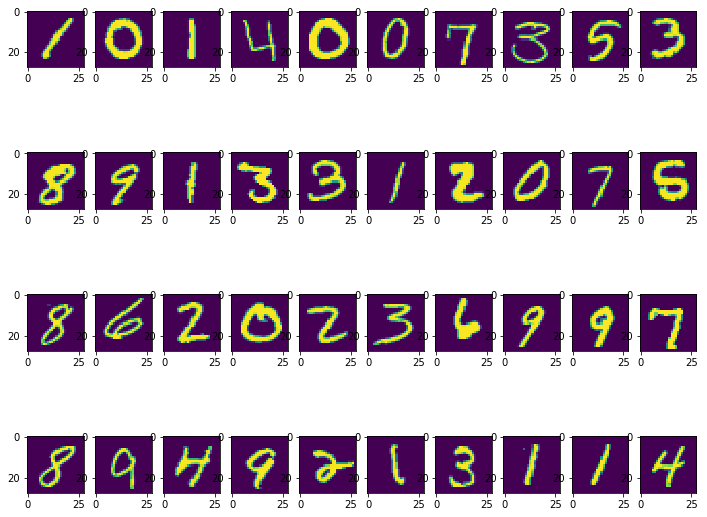

In [6]:
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [10]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (42000, 784)
42000 train samples
28000 test samples


In [15]:
# creating 28 by 28 images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [20]:
import tensorflow as tf

In [21]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, 3, activation="relu"),
        tf.keras.layers.Dropout(.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                77450     
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [25]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
42000/42000 [==============================]42000/42000 [==============================] - 216s 5ms/step - loss: 0.1849 - acc: 0.9440

Epoch 2/5
42000/42000 [==============================]42000/42000 [==============================] - 211s 5ms/step - loss: 0.0669 - acc: 0.9791

Epoch 3/5
42000/42000 [==============================]42000/42000 [==============================] - 191s 5ms/step - loss: 0.0510 - acc: 0.9836

Epoch 4/5
42000/42000 [==============================]42000/42000 [==============================] - 207s 5ms/step - loss: 0.0410 - acc: 0.9869

Epoch 5/5
42000/42000 [==============================]42000/42000 [==============================] - 219s 5ms/step - loss: 0.0342 - acc: 0.9892



In [26]:
# predictions
y_predict = model.predict_classes(X_test)
y_predict

array([2, 0, 9, ..., 3, 9, 2])

In [27]:
# saving the model
model.save("MNIST_MODEL.h5")

In [28]:
# creating the submission file
submission = pd.DataFrame({"ImageId":[i+1 for i in range(len(X_test))],
                           "Label": y_predict})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [30]:
submission.to_csv("submission_1.csv", index=False, header=True)